In [ ]:
!pip install --user -U nltk
!pip install gensim==3.6
# Now restart runtime

In [ ]:
import pandas as pd 
# Read data from file 'filename.csv' 

data = pd.read_csv("https://raw.githubusercontent.com/charlie-singer/ml/main/english_all.csv") 

# Preview the first 5 lines of the loaded data 

data.head()



,Unnamed: 0,Unnamed: 0.1,name,uri,id,artists,genre,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,duration_ms,lyrics,lang
0,0,0,On My Level (feat. Too $hort),spotify:track:0osPX8TruIebOhKuG6GK8C,0osPX8TruIebOhKuG6GK8C,Wiz Khalifa,hip-hop,0.720,0.514,-7.108,0.132,0.146000,142.980,0.107,0.212,272160,On My Level (feat. Too $hort) Lyrics[Intro]\nS...,en
1,1,1,Flex Up (feat. Future & Playboi Carti),spotify:track:5Ryu0SlsYjKh78RkJUONFr,5Ryu0SlsYjKh78RkJUONFr,Lil Yachty,hip-hop,0.829,0.667,-5.366,0.166,0.000523,160.082,0.048,0.545,170859,New Music Friday 11/27/20 LyricsYO VISTO ASÍ -...,en
2,2,2,Shortie Like Mine (feat. Chris Brown & Johntá ...,spotify:track:6oUGAx0vkBcnGzYkvw0ZsA,6oUGAx0vkBcnGzYkvw0ZsA,Bow Wow,hip-hop,0.758,0.642,-8.128,0.221,0.074500,142.078,0.191,0.701,268067,Chris Brown Videography Lyrics2005Whose Girl I...,en
3,3,3,Compensating (feat. Young Thug),spotify:track:61KoN6PlBhQD7sivCcf0hA,61KoN6PlBhQD7sivCcf0hA,Aminé,hip-hop,0.868,0.616,-5.405,0.170,0.292000,98.017,0.253,0.495,197856,New Music Friday 07/10/20 LyricsJuice WRLD - W...,en
4,4,4,Forever I'm Ready,spotify:track:42JxWmhlpbwrcGf8styJZY,42JxWmhlpbwrcGf8styJZY,Jeremih,hip-hop,0.467,0.693,-5.075,0.065,0.333000,63.353,0.109,0.546,225467,Forever I’m Ready Lyrics[Verse 1]\nDirty cup o...,en


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Clean up dataset by dropping duplicates and formatting columns
df = data.drop_duplicates(subset='id', keep="last")
df = df.iloc[: , 2:]
data = df


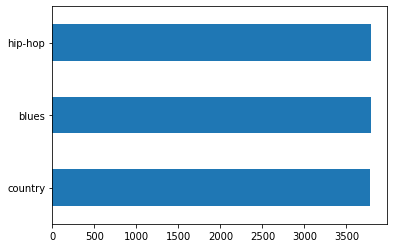

In [ ]:
#distribution of genres in dataset
import matplotlib.pyplot as plt
data.genre.value_counts().sort_values().plot(kind = 'barh')

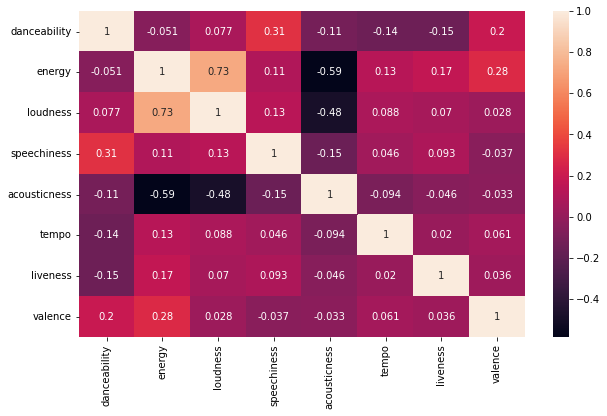

In [ ]:
#Correlation between numerical variables
import seaborn as sns
import matplotlib.pyplot as plt
data = data.drop(columns = ["duration_ms"])
cor = data.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

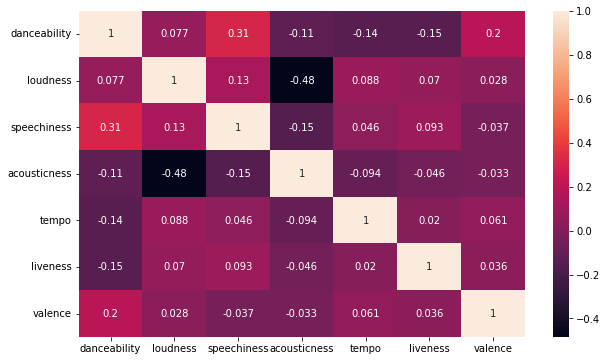

In [ ]:
#correlation when we drop energy from data
data = data.drop(columns=["energy"])
cor = data.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

In [ ]:
#Calculation of ranking for Random Forest, Code taken from lecture
from sklearn.model_selection import train_test_split
columns = ['danceability', 'loudness',
       'speechiness', 'acousticness', 'tempo', 'liveness', 'valence']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(data[columns], data["genre"], test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)
# Build a forest and obtain the feature importances
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train_rf, y_train_rf)
importances = forest.feature_importances_

# Obtain the positions of the sorted features (the most relevant first)
ind_rel_feat = np.argsort(importances)[::-1]

# Print the feature ranking
ranking_RF = pd.Series(importances[ind_rel_feat], index = X_train_rf.columns[ind_rel_feat]) 
ranking_RF

speechiness     0.304920
danceability    0.195411
loudness        0.113479
valence         0.106239
acousticness    0.102333
tempo           0.094344
liveness        0.083274
dtype: float64

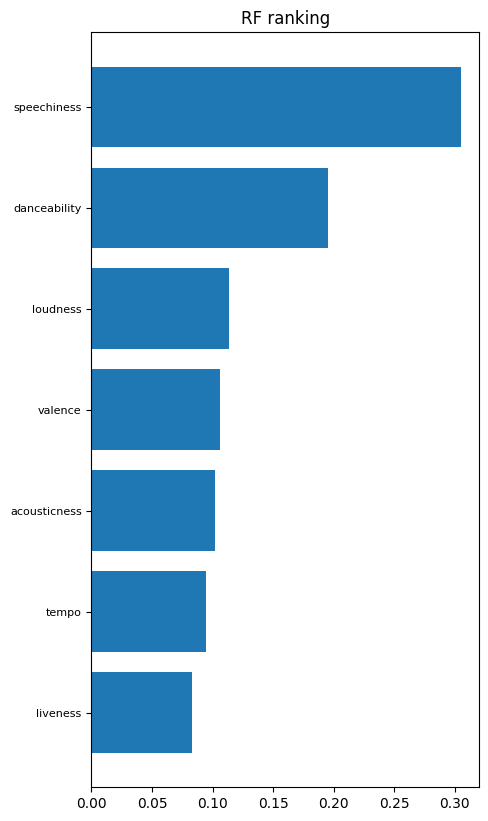

In [ ]:
#Plotting Random Forest Ranking (Code taken from lecture)
def plot_utility_scores(scores, title):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title(title)


plt.figure(dpi=100, figsize=(5, 10))
plt.rc('ytick', labelsize=8) 
plot_utility_scores(ranking_RF, title="RF ranking")

In [ ]:
# Code taken from lecture
from nltk.corpus import wordnet
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [ ]:
#Function to normalize text

import string 
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from string import digits
nltk.download('stopwords')
lemmatizer  = WordNetLemmatizer()
stopwords_en   = set(nltk.corpus.stopwords.words('english'))
stopwords_en.add("chorus")
stopwords_en.add("verse")
stopwords_en.add("feature")
stopwords_en.add("feat")
stopwords_en.add("feat.")
stopwords_en.add("lyric")
stopwords_en.add("lyrics")
punctuation = string.punctuation
def normalize_POS(text):
    # change to lower case and remove punctuation
    text2 = text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punctuation))))
    #removing digits
    remove_digits = str.maketrans('', '', digits)
    text3= text2.translate(remove_digits)
    # we tokenize
    text_tokens = nltk.word_tokenize(text3)
    #remove stop-words
    clean_text  = [t for t in text_tokens if (t not in stopwords_en)]
    # we lemmatize with POS
    text_tagged = nltk.pos_tag(clean_text)
    normalized_text = [lemmatizer.lemmatize(t, nltk_tag_to_wordnet_tag(tag)) if (nltk_tag_to_wordnet_tag(tag) is not None) else  lemmatizer.lemmatize(t) for (t, tag) in text_tagged]

    return normalized_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Getting corups
import nltk
nltk.download('omw-1.4')
corpus_prec1 = []
for text in data["lyrics"]:
    text_preproc = normalize_POS(text)
    corpus_prec1.append(text_preproc)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#Clean the corpus_prec of outliers

def func():
  for y in corpus_prec1:
    for x in y:
      if len(x) == 1:
        y.remove(x)
  return corpus_prec1
corpus_prec = func()


In [ ]:
#Frequency distribution visualization
#taken from lecture
tokens_corpus = [token for doc in corpus_prec for token in doc]
counts  = nltk.FreqDist(tokens_corpus)
vocab   = len(counts.keys()) 
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)



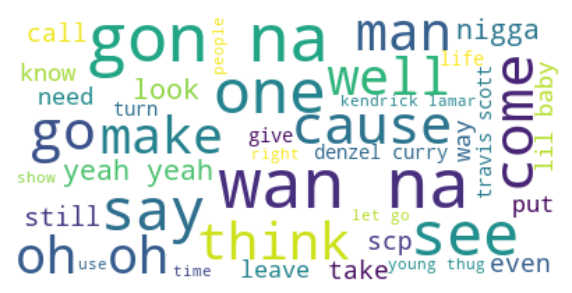

In [ ]:
#Word cloud visualizatiopn
#taken from lecture
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(' '.join(tokens_corpus))

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
#Code taken from lecture
import gensim

# Create dictionary of tokens: the input is the preprocessed corpus 
D = gensim.corpora.Dictionary(corpus_prec)
no_below = 10 # Número mínimo de documentos para mantener un término en el diccionario
no_above = .8 # Proporción máxima de documentos en los que puede aparecer un término para mantenerlo en el diccionario

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

The dictionary contains 1500 terms


In [ ]:
corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]

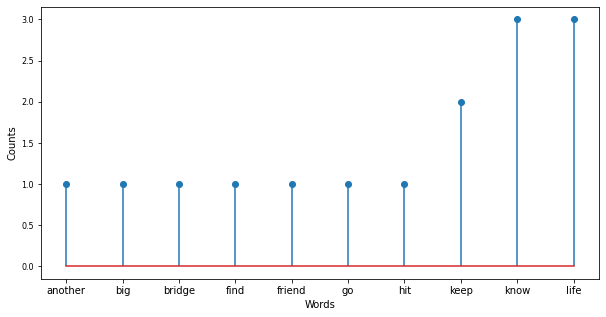

In [ ]:
#Plot BoW
n_doc=8000
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [ ]:
from gensim.models import TfidfModel
model = TfidfModel(corpus_bow)
corpus_tfidf = [model[doc] for doc in corpus_bow]

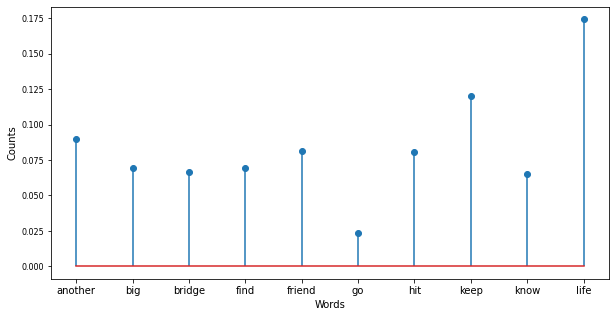

In [ ]:
#Plot Tf-idf
n_doc=8000
list_tfidf = [(D[doc_tfidf[0]], doc_tfidf[1]) for doc_tfidf in corpus_tfidf[n_doc][:10]]
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)

# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

In [ ]:
#numerical data (with no energy)
numerical = data[['danceability',  'loudness', 'speechiness', 'acousticness',
       'tempo', 'liveness', 'valence']]
#normalizes the data
numerical
numerical = (numerical-numerical.min())/ (numerical.max() - numerical.min())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

#Get numerical values (bass, etc.) and normalize


# Divide the data into train test partitions
id_tot = np.arange(corpus_tfidf_sparse.shape[0])
id_train, id_test = train_test_split(id_tot, test_size=0.4, random_state=42)

id_tot_num = np.arange(numerical.shape[0])
id_train_num, id_test_num = train_test_split(id_tot, test_size=0.4, random_state=42)

# Train and test for only lyrics
X_train_lyrics = corpus_tfidf_sparse[id_train,:]
X_test_lyrics = corpus_tfidf_sparse[id_test,:]

#Train and test for only numerical
X_train_num = numerical.iloc[id_train_num,:]
X_test_num = numerical.iloc[id_test_num,:]

#Train and test for both
X_train = hstack([X_train_lyrics, X_train_num])
X_test  = hstack([X_test_lyrics,X_test_num])

# Y train and test
Y = data[["genre"]]
y_train = Y.iloc[id_train,:].values.ravel()
y_test = Y.iloc[id_test,:]


clf_num = LogisticRegression(solver = "liblinear").fit(X_train_num, y_train)
clf_lyr = LogisticRegression(solver = "liblinear").fit(X_train_lyrics, y_train)
clf = LogisticRegression(solver = "liblinear").fit(X_train, y_train)




print("Just Lyrics Predictions:")
predictions_lyr = clf_lyr.predict(X_test_lyrics)
score_lyr = clf_lyr.score(X_test_lyrics, y_test)
print(score_lyr)

print("Just attributes predictions:")
predictions_num = clf_num.predict(X_test_num)
score_num = clf_num.score(X_test_num, y_test)
print(score_num)

print("Both together predictions:")
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

Just Lyrics Predictions:
0.7640721196130167
Just attributes predictions:
0.7062445030782761
Both together predictions:
0.7897977132805629


In [ ]:
categorical_cols = ["genre"] 

#import pandas as pd
Y_c = pd.get_dummies(data, columns = categorical_cols)



In [ ]:
lda_model_10 = gensim.models.LdaMulticore(corpus_bow, num_topics=8, id2word = D, passes=20)

In [ ]:
!pip install wordcloud 

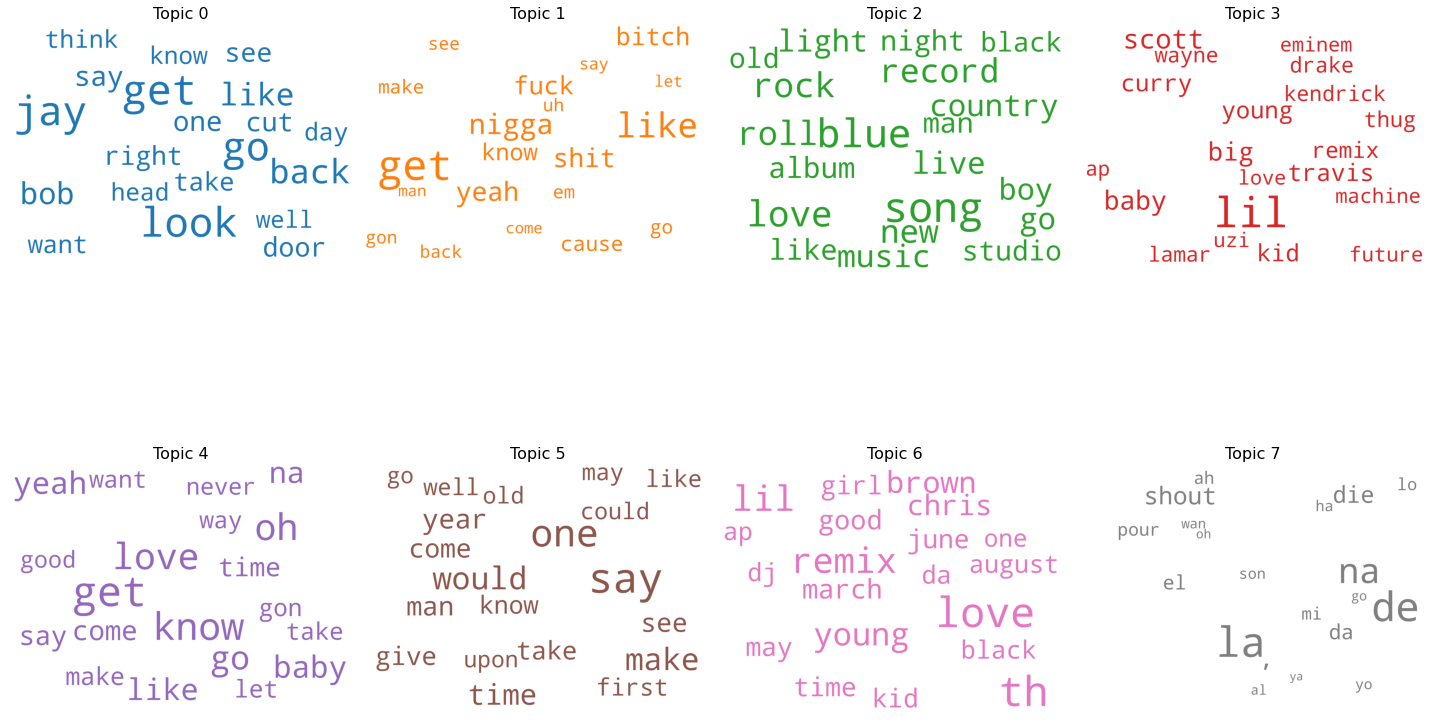

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_10.show_topics(formatted=False,num_words=20)

fig, axes = plt.subplots(2, 4, figsize=(20,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


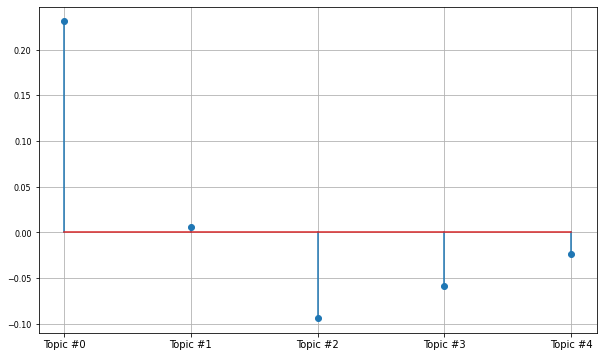

In [ ]:
#Topic Model Visualization of our Document Analysis
from gensim.models import LsiModel

model = LsiModel(corpus_tfidf, num_topics=5, id2word=D)

term_topic_mat_gensim = model.get_topics().T

plt.figure(figsize=(10,6))
plt.stem(range(5),[s[1] for s in model[corpus_tfidf[n_doc]]])
plt.grid()
plt.xticks(ticks=range(5),labels=['Topic #'+str(k) for k in range(5)])
plt.show()


In [ ]:
#Highest contributing words in each topic

model.print_topics(num_words = 10)

[(0,
  '0.144*"yeah" + 0.143*"nigga" + 0.132*"love" + 0.116*"oh" + 0.113*"like" + 0.110*"get" + 0.110*"lil" + 0.109*"na" + 0.108*"baby" + 0.096*"gon"'),
 (1,
  '0.410*"lil" + 0.223*"remix" + -0.181*"nigga" + -0.171*"yeah" + 0.120*"young" + 0.116*"ap" + -0.115*"oh" + 0.106*"da" + -0.099*"bitch" + 0.097*"kid"'),
 (2,
  '0.514*"nigga" + 0.314*"bitch" + 0.225*"shit" + 0.222*"fuck" + 0.186*"lil" + 0.147*"niggas" + -0.140*"oh" + -0.139*"love" + 0.136*"ayy" + 0.130*"uh"'),
 (3,
  '0.457*"ooh" + 0.412*"oh" + 0.293*"yeah" + 0.258*"baby" + 0.195*"lil" + 0.174*"na" + 0.118*"love" + 0.103*"wan" + 0.098*"gon" + 0.093*"hey"'),
 (4,
  '-0.762*"ooh" + 0.363*"na" + 0.264*"gon" + 0.155*"wan" + 0.153*"baby" + 0.093*"lil" + 0.086*"hey" + -0.074*"la" + 0.056*"love" + 0.054*"tonight"')]

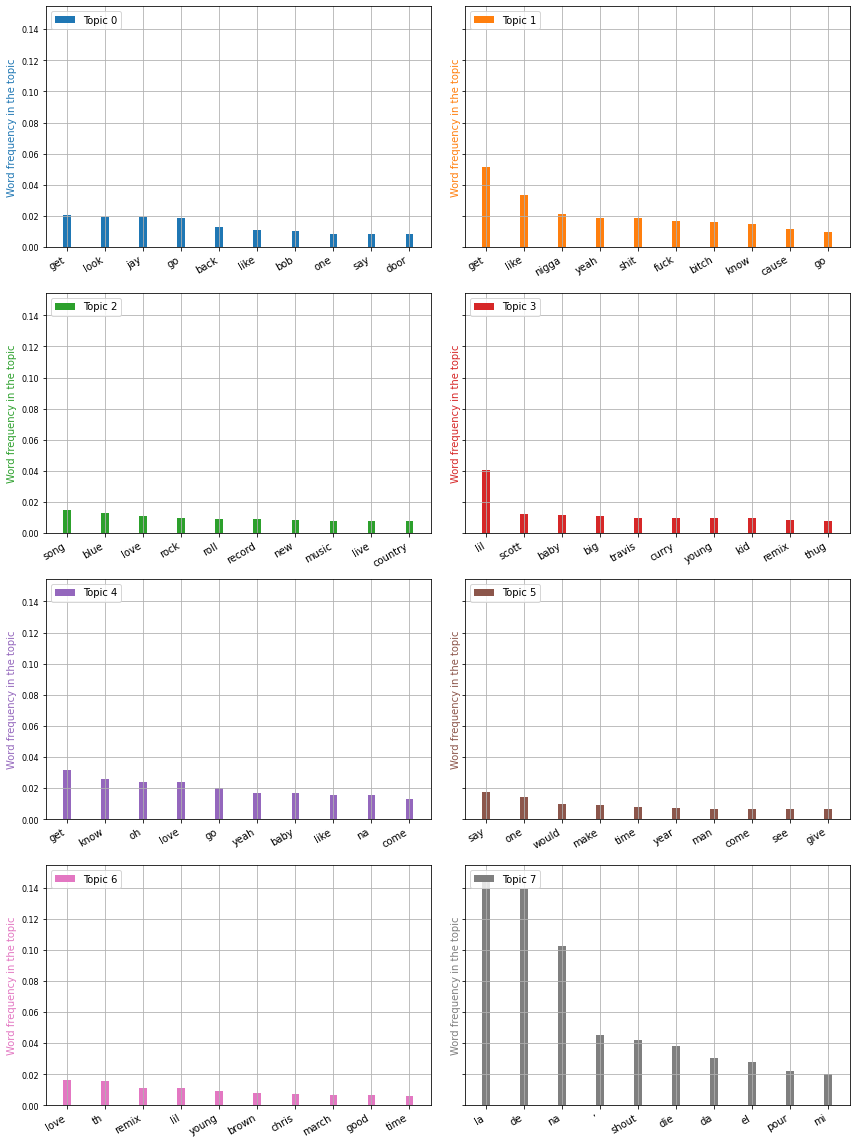

In [ ]:
import warnings   # I get some matplotlib warnings 
warnings.filterwarnings('ignore')

from collections import Counter
topics = lda_model_10.show_topics(formatted=False)
data_flat = [w for w_list in corpus_bow for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(12,16), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    
    ax.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Topic '+str(i))
    ax.set_ylabel('Word frequency in the topic', color=cols[i])
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right',)
    ax.legend(loc='upper left'); 
    ax.grid()
    
fig.tight_layout(w_pad=2)    
plt.show()

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Con TaggedDocument, creamos un diccionario
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data['lyrics'])]

model = Doc2Vec(documents, vector_size=150,epochs=10)



In [ ]:
print(gensim.__version__)

3.6.0


In [ ]:
vector = model.docvecs.vectors_docs[85, :]

n_doc=8000

print(f"{data['name'][n_doc]}\n")


print(f"The 5 most similar songs by lyrics are:\n")

most_sim = model.docvecs.most_similar([vector], topn=6)

for item in most_sim:
    idy = item[0]
    if idy != n_doc:
        print(f"{data['name'][idy]}\n")
        print('*****')

You Are My Kind (feat. Seal)

The 5 most similar songs by lyrics are:

Lift Me Up

*****
Headshots (4r Da Locals)

*****
Wish I Had It

*****
Over Your Head

*****
Quarter Past Nine

*****
The Best Day

*****


In [ ]:

data_no_hip_hop = data[data["genre"]!="hip-hop"]
numerical = data_no_hip_hop[['danceability', 'loudness',
       'speechiness', 'acousticness', 'tempo', 'liveness', 'valence']]
#normalizes the data

numerical = (numerical-numerical.min())/ (numerical.max() - numerical.min())

corpus_prec = []

for text in data_no_hip_hop["lyrics"]:
    text_preproc = normalize_POS(text)
    corpus_prec.append(text_preproc)


D = gensim.corpora.Dictionary(corpus_prec)
no_below = 10 # Número mínimo de documentos para mantener un término en el diccionario
no_above = .8 # Proporción máxima de documentos en los que puede aparecer un término para mantenerlo en el diccionario

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]

from gensim.models import TfidfModel
model = TfidfModel(corpus_bow)
corpus_tfidf = [model[doc] for doc in corpus_bow]

from gensim.matutils import corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
# Convert TFIDF representacion

corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

id_tot = np.arange(corpus_tfidf_sparse.shape[0])
id_train, id_test = train_test_split(id_tot, test_size=0.4, random_state=42)


id_tot_num = np.arange(numerical.shape[0])
id_train_num, id_test_num = train_test_split(id_tot, test_size=0.4, random_state=42)

# Train and test for only lyrics
X_train_lyrics = corpus_tfidf_sparse[id_train,:]
X_test_lyrics = corpus_tfidf_sparse[id_test,:]

#Train and test for only numerical
X_train_num = numerical.iloc[id_train_num,:]
X_test_num = numerical.iloc[id_test_num,:]

#Train and test for both
X_train = hstack([X_train_lyrics, X_train_num])
X_test  = hstack([X_test_lyrics,X_test_num])

Y = data_no_hip_hop[["genre"]]
y_train = Y.iloc[id_train,:].values.ravel()
y_test = Y.iloc[id_test,:]

clf_lyr = LogisticRegression(solver = "liblinear").fit(X_train, y_train)

print("Score for Country and blues:")
predictions_lyr = clf_lyr.predict(X_test)
score_lyr = clf_lyr.score(X_test, y_test)
print(score_lyr)

The dictionary contains 1500 terms
Score for Country and blues:
0.7765676567656765


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_lyr)

print(cf_matrix)

[[1196  321]
 [ 356 1157]]


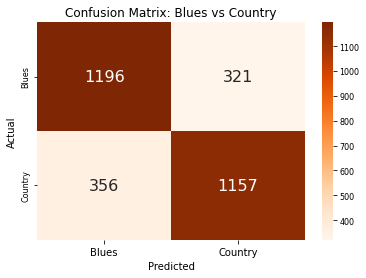

In [ ]:
ax = plt.axes()
sns.heatmap(np.array([[1196, 321], [356, 1157]]), annot = True,  fmt = 'd' ,annot_kws = {'size': 16}, cmap = 'Oranges', ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix: Blues vs Country')
ax.xaxis.set_ticklabels(['Blues','Country'])
ax.yaxis.set_ticklabels(['Blues','Country'])
plt.show()

In [ ]:
data_no_blues = data[data["genre"]!="blues"]
numerical = data_no_blues[['danceability', 'loudness',
       'speechiness', 'acousticness', 'tempo', 'liveness', 'valence']]
#normalizes the data

numerical = (numerical-numerical.min())/ (numerical.max() - numerical.min())

corpus_prec = []

for text in data_no_blues["lyrics"]:
    text_preproc = normalize_POS(text)
    corpus_prec.append(text_preproc)


D = gensim.corpora.Dictionary(corpus_prec)
no_below = 10 # Número mínimo de documentos para mantener un término en el diccionario
no_above = .8 # Proporción máxima de documentos en los que puede aparecer un término para mantenerlo en el diccionario

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]

from gensim.models import TfidfModel
model = TfidfModel(corpus_bow)
corpus_tfidf = [model[doc] for doc in corpus_bow]

from gensim.matutils import corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
# Convert TFIDF representacion

corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

id_tot = np.arange(corpus_tfidf_sparse.shape[0])
id_train, id_test = train_test_split(id_tot, test_size=0.4, random_state=42)


id_tot_num = np.arange(numerical.shape[0])
id_train_num, id_test_num = train_test_split(id_tot, test_size=0.4, random_state=42)

# Train and test for only lyrics
X_train_lyrics = corpus_tfidf_sparse[id_train,:]
X_test_lyrics = corpus_tfidf_sparse[id_test,:]

#Train and test for only numerical
X_train_num = numerical.iloc[id_train_num,:]
X_test_num = numerical.iloc[id_test_num,:]

#Train and test for both
X_train = hstack([X_train_lyrics, X_train_num])
X_test  = hstack([X_test_lyrics,X_test_num])

Y = data_no_blues[["genre"]]
y_train = Y.iloc[id_train,:].values.ravel()
y_test = Y.iloc[id_test,:]

clf_lyr = LogisticRegression(solver = "liblinear").fit(X_train, y_train)

print("Score for Country and Hip-hop:")
predictions_lyr = clf_lyr.predict(X_test)
score_lyr = clf_lyr.score(X_test, y_test)
print(score_lyr)

The dictionary contains 1500 terms
Score for Country and Hip-hop:
0.9330695680844049


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_lyr)

print(cf_matrix)

[[1435   73]
 [ 130 1395]]


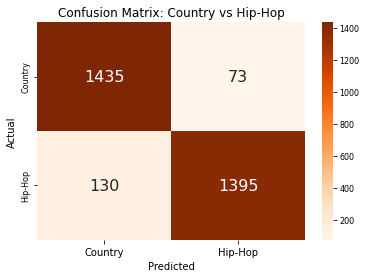

In [ ]:
ax = plt.axes()
sns.heatmap(np.array([[1435, 73], [130, 1395]]), annot = True,  fmt = 'd' ,annot_kws = {'size': 16}, cmap = 'Oranges', ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix: Country vs Hip-Hop')
ax.xaxis.set_ticklabels(['Country','Hip-Hop'])
ax.yaxis.set_ticklabels(['Country','Hip-Hop'])
plt.show()

In [ ]:
data_no_country = data[data["genre"]!="country"]
numerical = data_no_country[['danceability', 'loudness',
       'speechiness', 'acousticness', 'tempo', 'liveness', 'valence']]
#normalizes the data

numerical = (numerical-numerical.min())/ (numerical.max() - numerical.min())

corpus_prec = []

for text in data_no_country["lyrics"]:
    text_preproc = normalize_POS(text)
    corpus_prec.append(text_preproc)


D = gensim.corpora.Dictionary(corpus_prec)
no_below = 10 # Número mínimo de documentos para mantener un término en el diccionario
no_above = .8 # Proporción máxima de documentos en los que puede aparecer un término para mantenerlo en el diccionario

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]

from gensim.models import TfidfModel
model = TfidfModel(corpus_bow)
corpus_tfidf = [model[doc] for doc in corpus_bow]

from gensim.matutils import corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
# Convert TFIDF representacion

corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

id_tot = np.arange(corpus_tfidf_sparse.shape[0])
id_train, id_test = train_test_split(id_tot, test_size=0.4, random_state=42)


id_tot_num = np.arange(numerical.shape[0])
id_train_num, id_test_num = train_test_split(id_tot, test_size=0.4, random_state=42)

# Train and test for only lyrics
X_train_lyrics = corpus_tfidf_sparse[id_train,:]
X_test_lyrics = corpus_tfidf_sparse[id_test,:]

#Train and test for only numerical
X_train_num = numerical.iloc[id_train_num,:]
X_test_num = numerical.iloc[id_test_num,:]

#Train and test for both
X_train = hstack([X_train_lyrics, X_train_num])
X_test  = hstack([X_test_lyrics,X_test_num])

Y = data_no_country[["genre"]]
y_train = Y.iloc[id_train,:].values.ravel()
y_test = Y.iloc[id_test,:]

clf_lyr = LogisticRegression(solver = "liblinear").fit(X_train, y_train)

print("Score for Blues and Hip-hop:")
predictions_lyr = clf_lyr.predict(X_test)
score_lyr = clf_lyr.score(X_test, y_test)
print(score_lyr)

The dictionary contains 1500 terms
Score for Blues and Hip-hop:
0.9241924851680949


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_lyr)

print(cf_matrix)

[[1417   93]
 [ 137 1387]]


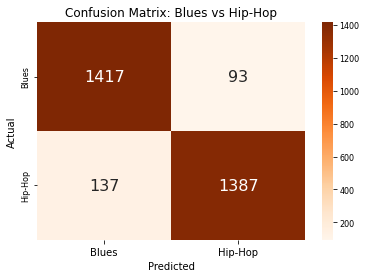

In [ ]:
ax = plt.axes()
sns.heatmap(np.array([[1417, 93], [137, 1387]]), annot = True,  fmt = 'd' ,annot_kws = {'size': 16}, cmap = 'Oranges', ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix: Blues vs Hip-Hop')
ax.xaxis.set_ticklabels(['Blues','Hip-Hop'])
ax.yaxis.set_ticklabels(['Blues','Hip-Hop'])
plt.show()